In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
dataset = pd.read_csv("../datasets/question2/q2-train-features.csv")

In [3]:
dataset.head()

,Date,Months Past Since November 2014,Price,CPI,Unemployment Rate
0,Nov 14,0,2.2196,248.37,19.9
1,Dec 14,1,2.3345,248.82,20.2
2,Jan 15,2,2.4464,247.72,20.0
3,Feb 15,3,2.5088,250.45,20.0
4,Mar 15,4,2.5978,252.24,18.6


In [4]:
data = dataset.iloc[:, 1:5].values

In [5]:
y_label = np.transpose(data[:, 1:2])[0]

In [6]:
def w_head(x_data, y_data):
    return np.dot( np.dot( np.linalg.inv( (np.dot( (np.transpose(x_data)),x_data)) ) , np.transpose(x_data) ), y_data)

In [7]:
def predict(weights, data):
    return  np.dot(data, weights)

def mse(y_head, y):
    mse = 0
    for i in range(y.shape[0]):
        mse += np.power((y[i] - y_head[i]), 2)
    return mse / len(y)

In [8]:
## preprocessing for q2.2
#data_q22 = data[:, 1:3]
x_q22 = data[:, 0:1]


In [9]:
train_q22 = np.concatenate([np.ones((x_q22.shape[0],1),dtype=x_q22.dtype),x_q22], axis=1)

In [10]:
w_q22 = w_head(train_q22, y_label)

In [11]:
print( "Question 2.2 Coefficients: ", w_q22 )

Question 2.2 Coefficients:  [2.00237154 0.06342816]


In [12]:
predictions_q22 = predict(w_q22, train_q22)

Text(0.5, 0, 'Months Past Since November 2014')

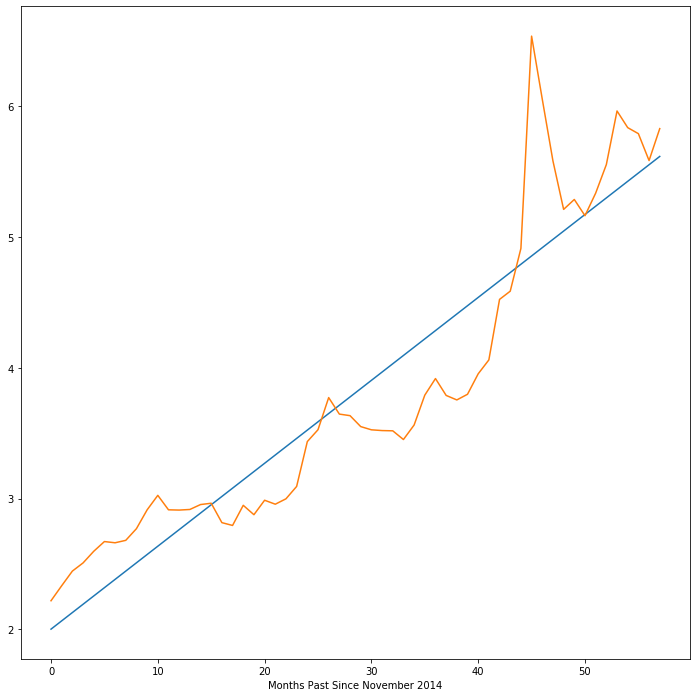

In [13]:
fig = plt.figure(figsize=(12,12))
plt.plot(x_q22, predictions_q22, label = "predictions") 
plt.plot(x_q22, y_label, label = "real values") 
plt.xlabel("Months Past Since November 2014")

In [14]:
mse_q22 = mse(predictions_q22, y_label)
print( "Mean Square Error: " , mse_q22)

Mean Square Error:  0.1878714027639879


In [15]:
############## Question 2.3 #################

In [16]:
x_q23 = data[:, 2:3]
x_q23 = np.concatenate([x_q22, x_q23], axis = 1)
train_q23 = np.concatenate([np.ones((x_q23.shape[0],1),dtype=x_q23.dtype),x_q23], axis=1)

In [17]:
w_q23 = w_head(train_q23, y_label)

In [18]:
print( "Question 2.3 Coefficients: ", w_q23 )

Question 2.3 Coefficients:  [-3.28416548 -0.01032575  0.02338648]


In [19]:
predictions_q23 = predict(w_q23, train_q23)

Text(0.5, 0, 'Months Past Since November 2014')

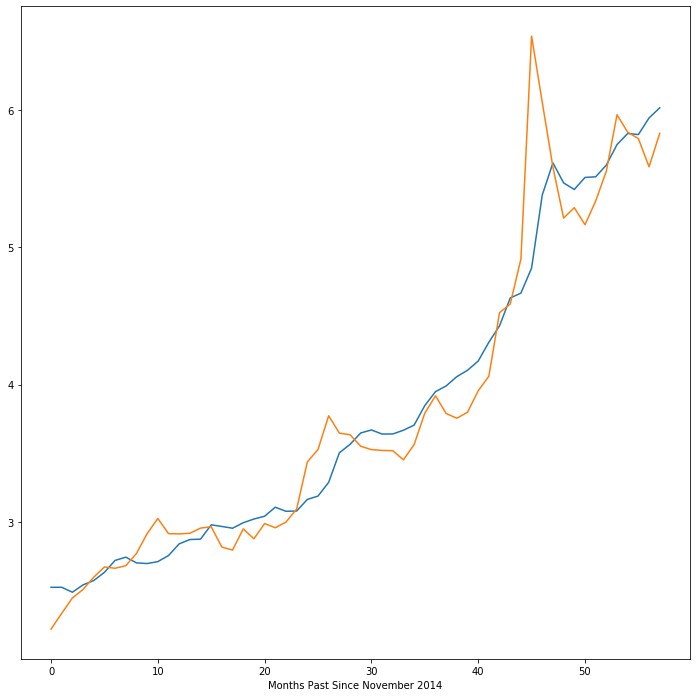

In [20]:
fig = plt.figure(figsize=(12,12))
plt.plot(x_q23[:, 0:1], predictions_q23, label = "predictions") 
plt.plot(x_q23[:, 0:1], y_label, label = "real values") 
plt.xlabel("Months Past Since November 2014")

In [21]:
mse_q23 = mse(predictions_q23, y_label)
print( "Mean Square Error: " , mse_q23)

Mean Square Error:  0.0891442586694583


In [22]:
#### Question 2.4 #######

In [23]:
x_q24 = data[:, 3:4]
x_q24 = np.concatenate([x_q23, x_q24], axis = 1)
train_q24 = np.concatenate([np.ones((x_q24.shape[0],1),dtype=x_q24.dtype),x_q24], axis=1)

In [24]:
w_q24 = w_head(train_q24, y_label)

In [25]:
print( "Question 2.4 Coefficients: ", w_q24 )

Question 2.4 Coefficients:  [-3.29005917e+00 -1.01887495e-02  2.32930116e-02  1.53083663e-03]


In [26]:
predictions_q24 = predict(w_q24, train_q24)

Text(0.5, 0, 'Months Past Since November 2014')

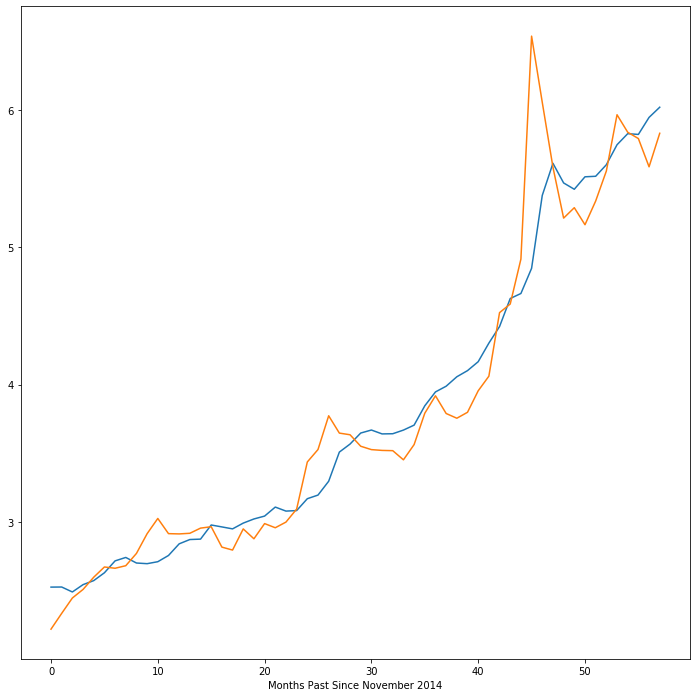

In [27]:
fig = plt.figure(figsize=(12,12))
plt.plot(x_q24[:, 0:1], predictions_q24, label = "predictions") 
plt.plot(x_q24[:, 0:1], y_label, label = "real values") 
plt.xlabel("Months Past Since November 2014")

In [28]:
mse_q24 = mse(predictions_q24, y_label)
print( "Mean Square Error: " , mse_q24)

Mean Square Error:  0.08913535296420343


In [29]:
#### Question 2.5 ####
train_A = train_q22[:-3,:]
test_A = train_q22[55:,:]
train_B = train_q23[:-3,:]
test_B = train_q23[55:,:]
train_C = train_q24[:-3,:]
test_C = train_q24[55:,:]
train_label = y_label[:-3]
test_label = y_label[55:]

In [30]:
w_A = w_head(train_A, train_label)
print( "Weights: " , w_A)

Weights:  [2.02311968 0.062292  ]


In [31]:
w_B = w_head(train_B, train_label)
print( "Weights: " , w_B)

Weights:  [-3.58466521 -0.01285093  0.02460791]


In [32]:
w_C = w_head(train_C, train_label)
print( "Weights: " , w_C)

Weights:  [-3.66437537 -0.01214502  0.02406634  0.01128299]


In [33]:
pred_A = predict(w_A, test_A)
mse_A = mse(pred_A, test_label)
print( "Mean Square Error: " , mse_A)

Mean Square Error:  0.0630578697927954


In [34]:
pred_B = predict(w_B, test_B)
mse_B = mse(pred_B, test_label)
print( "Mean Square Error: " , mse_B)

Mean Square Error:  0.08556456925682403


In [35]:
pred_C = predict(w_C, test_C)
mse_C = mse(pred_C, test_label)
print( "Mean Square Error: " , mse_C)

Mean Square Error:  0.10555750471011383
